## Equation solving using pseudo-inverses  

Author: OJM.  


- We saw that inverses are unstable even when exist  
- Before we deal with stability, let's deal with existence and uniqueness  
- Same stability issue, but guide!  
- Bias, variance trade-offs  
- Gen inverse: simplest, within perfect fit class! Follows noise...

In [1]:
import numpy as np

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

#### Projectile motion

In [3]:
def model(t,a,b,c):
    #return a + 10*b*t - 0.5*c*t**2
    return a + b*t - 0.5*c*t**2
vmodel = np.vectorize(model)

In [4]:
#input 'signal'
t = np.linspace(0,15,1000)
x = vmodel(t,10,100,9.81)

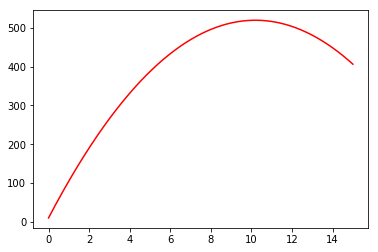

In [5]:
plt.plot(t,x,'r')
plt.show()

In [128]:
def fmap(tobs):
    A = np.zeros((len(tobs),3))
    for i, ti in enumerate(tobs):
        A[i,:] = np.array([1,ti,-0.5*ti**2])
    return A

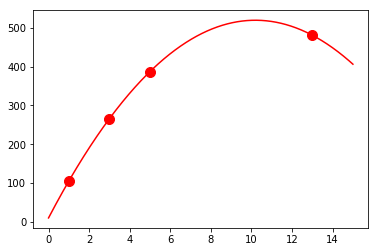

In [129]:
#true parameters
theta_true = np.array([10,100,9.81])

#fine time grid
t = np.linspace(0,15,1000)

#observation times
#tobs = np.array([1,13]) #under-determined
tobs = np.array([1,3,5,13]) #over-determined

#forward map
Aobs = fmap(tobs)

#observed data
yobs = np.dot(Aobs,theta_true) #noise-free
#yobs = np.dot(Aobs,theta_true) + np.random.normal(0,30,size=len(tobs)) #with noise

#plots
plt.plot(tobs,yobs,'ro',markersize=10)
plt.plot(t,x,'r')
plt.show()

In [62]:
Apinv = np.linalg.pinv(Aobs)

In [63]:
min(Aobs.shape)

3

In [80]:
Aobs

array([[  1. ,   1. ,  -0.5],
       [  1. ,   3. ,  -4.5],
       [  1. ,   5. , -12.5],
       [  1. ,  13. , -84.5]])

In [140]:
U = np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,0]])

In [141]:
U

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [142]:
V = np.array([[1,0,0],[0,1,0],[0,0,1]])

In [114]:
U@V.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [115]:
Aobs = U@V.T

In [116]:
Aobs

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [130]:
U, s, VT = np.linalg.svd(Aobs, full_matrices=False)
V = VT.T

In [132]:
U

array([[-0.00769051,  0.29107872,  0.89685522],
       [-0.05693158,  0.58920415,  0.1049587 ],
       [-0.15174676,  0.73868339, -0.42646699],
       [-0.98674848, -0.14986157,  0.05253846]])

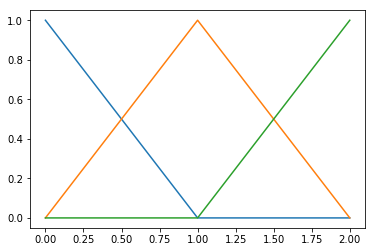

In [143]:
plt.plot(V)
plt.show()

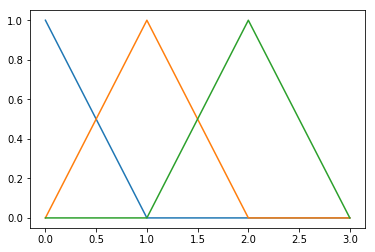

In [144]:
for i in range(0,3):
    plt.plot(U[:,i])
plt.show()

In [118]:
U

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.]])

In [119]:
U@U.T

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [120]:
V

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [121]:
U.shape

(4, 3)

In [122]:
U@U.T

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [123]:
V

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [124]:
V@V.T

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [125]:
#Model resolution essentially identity
R_model = Apinv @ Aobs
R_model

array([[ 1.27217295,  0.19678492, -0.52924058],
       [-0.40687361,  0.07649667,  0.38968958],
       [-0.04767184,  0.01441242,  0.05349224]])

In [126]:
#data resolution not identity
R_data = Aobs @ Apinv
R_data

array([[ 1.27217295,  0.19678492, -0.52924058,  0.06028271],
       [-0.40687361,  0.07649667,  0.38968958, -0.05931264],
       [-0.04767184,  0.01441242,  0.05349224, -0.02023282],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [127]:
Aobs

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [ ]:
plt.plot()

In [81]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [85]:
bmatrix(V)

'\\begin{bmatrix}\n  -0.01388544 & 0.35601275 & 0.93437793\\\\\n  -0.15886432 & 0.92181289 & -0.3535861\\\\\n  0.98720278 & 0.15334901 & -0.04375794\\\\\n\\end{bmatrix}'

In [58]:
theta_min = np.dot(Apinv,yobs)
print(theta_min)
print(theta_true)

[  10.    100.      9.81]
[  10.    100.      9.81]


In [59]:
print(np.linalg.norm(theta_min,2))
print(np.linalg.norm(theta_true,2))

100.976413583
100.976413583


In [60]:
Atrue = fmap(t)

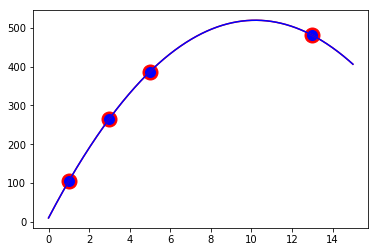

In [61]:
plt.plot(tobs,yobs,'ro',markersize=15)
plt.plot(tobs,np.dot(Aobs,theta_min),'bo',markersize=10)

plt.plot(t,np.dot(Atrue,theta_true),'r')
plt.plot(t,np.dot(Atrue,theta_min),'b')
plt.show()

##### Loopstrap  

Resampling

In [62]:
#true parameters
theta_true = np.array([10,100,9.81])

#observation times
#tobs = np.array([1,13]) #under-determined
#tobs = np.array([1,9]) #under-determined
tobs = np.array([1,3,5,13]) #over-determined

#forward map
Aobs = fmap(tobs)

#repeated small noise
num_repeats = 1000
thetas = np.zeros((num_repeats,len(theta_true)))
norms = np.zeros(num_repeats)
for i in range(num_repeats):
    #observed data
    yobs = np.dot(Aobs,theta_true) + np.random.normal(0,30,size=len(tobs)) #with noise

    #invert
    Apinv = np.linalg.pinv(Aobs)
    theta_min = np.dot(Apinv,yobs)
    thetas[i,:] = theta_min
    norms[i] = np.linalg.norm(theta_min,2)

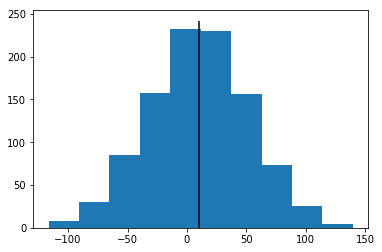

In [63]:
plt.hist(thetas[:,0],color='b')
plt.vlines(x=theta_true[0],ymin=0,ymax=np.max(plt.hist(thetas[:,0])[0]+10))
plt.show()

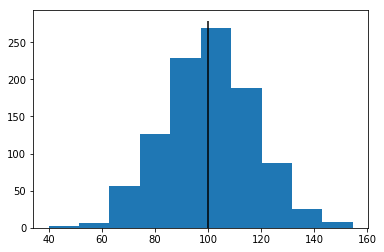

In [64]:
plt.hist(thetas[:,1],color='b')
plt.vlines(x=theta_true[1],ymin=0,ymax=np.max(plt.hist(thetas[:,1])[0]+10))
plt.show()

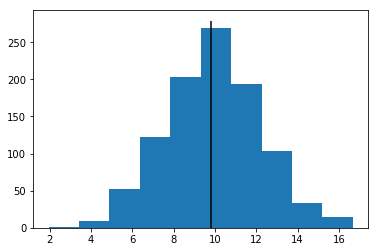

In [65]:
plt.hist(thetas[:,2],color='b')
plt.vlines(x=theta_true[2],ymin=0,ymax=np.max(plt.hist(thetas[:,2])[0]+10))
plt.show()

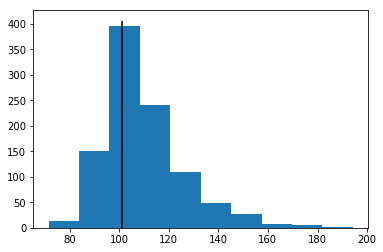

In [66]:
plt.hist(norms,color='b')
plt.vlines(x=np.linalg.norm(theta_true),ymin=0,ymax=np.max(plt.hist(norms)[0]+10))
plt.show()

In [67]:
np.linalg.norm(theta_true)

100.97641358257877

In [68]:
np.mean(norms)

109.87078989333239

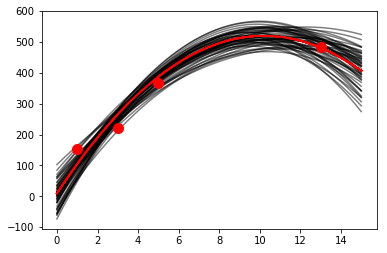

In [69]:
for i in range(0,50):
    thetai = thetas[i,:]
    plt.plot(t,np.dot(Atrue,thetai),'k',alpha=0.5)
    plt.plot(t,np.dot(Atrue,theta_true),'r')
plt.plot(tobs,yobs,'ro',markersize=10)
plt.show()

##### Higher-order polynomials

In [70]:
def fmap_poly(tobs,n):
    A = np.zeros((len(tobs),n))
    for i, ti in enumerate(tobs):
        #A[i,:] = np.array([1,10*ti,-0.5*ti**2])
        A[i,:] = np.array([ti**j for j in range(0,n)])
    return A

In [71]:
#observation times
#tobs = np.array([1,13]) #under-determined
tobs = np.array([1,3,5,10,15]) #over-determined

order = 5
Ap_obs = fmap_poly(tobs,n=order)
Ap_true = fmap_poly(t,n=order)

In [72]:
thetap_true = np.zeros(order)
thetap_true[1] = 1
thetap_true

array([ 0.,  1.,  0.,  0.,  0.])

In [73]:
np.dot(Ap_obs,thetap_true)

array([  1.,   3.,   5.,  10.,  15.])

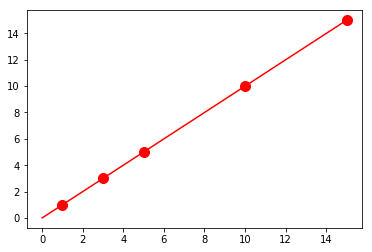

In [74]:
plt.plot(tobs,np.dot(Ap_obs,thetap_true),'ro',markersize=10)
#plt.plot(tobs,yp_obs,'ro',markersize=10)

plt.plot(t,np.dot(Ap_true,thetap_true),'r')
#plt.plot(t,np.dot(Atrue,theta_min),'b')
plt.show()

In [75]:
#observed data
#yp_obs = np.dot(Ap_obs,thetap_true)
yp_obs = np.dot(Ap_obs,thetap_true) + np.random.normal(0,0.5,size=len(tobs)) #with noise

#invert
Ap_obs_pinv = np.linalg.pinv(Ap_obs)
thetap_min = np.dot(Ap_obs_pinv,yp_obs)

In [76]:
print(thetap_min)
print(thetap_true)

[ -3.63366233e-02   8.61423097e-01   3.58597478e-02  -3.80598711e-03
   1.26992792e-04]
[ 0.  1.  0.  0.  0.]


In [77]:
print(np.linalg.norm(thetap_min,2))
print(np.linalg.norm(thetap_true,2))

0.862942944928
1.0


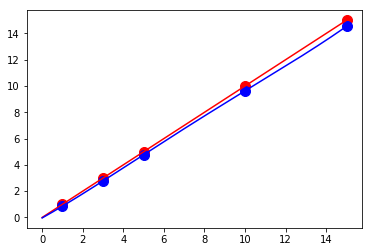

In [78]:
#key figure: simplest, within perfect fit class...
plt.plot(tobs,np.dot(Ap_obs,thetap_true),'ro',markersize=10)
plt.plot(tobs,yp_obs,'bo',markersize=10)

plt.plot(t,np.dot(Ap_true,thetap_true),'r')
plt.plot(t,np.dot(Ap_true,thetap_min),'b')
plt.show()

In [79]:
#true parameters
#thetap_true = np.array([10,100,9.81])

#observation times
#tobs = np.array([1,13]) #under-determined
#tobs = np.array([1,9]) #under-determined
#tobs = np.array([1,3,5,10]) #over-determined

#forward map
#order = 5
Ap_obs = fmap_poly(tobs,n=order)
Ap_true = fmap_poly(t,n=order)

#repeated small noise
num_repeats = 1000
thetas = np.zeros((num_repeats,len(thetap_true)))
norms = np.zeros(num_repeats)
for i in range(num_repeats):
    #observed data
    yp_obs = np.dot(Ap_obs,thetap_true) + np.random.normal(0,30,size=len(tobs)) #with noise

    #invert
    Ap_pinv = np.linalg.pinv(Ap_obs)
    thetap_min = np.dot(Ap_pinv,yp_obs)
    thetas[i,:] = thetap_min
    norms[i] = np.linalg.norm(thetap_min,2)

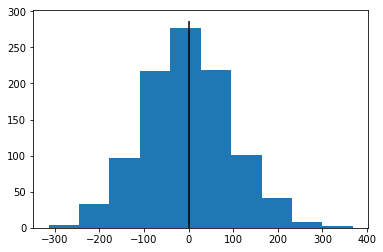

In [80]:
plt.hist(thetas[:,0],color='b')
plt.vlines(x=thetap_true[0],ymin=0,ymax=np.max(plt.hist(thetas[:,0])[0]+10))
plt.show()

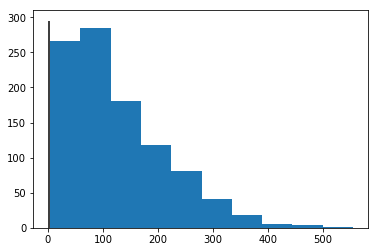

In [81]:
plt.hist(norms,color='b')
plt.vlines(x=np.linalg.norm(thetap_true),ymin=0,ymax=np.max(plt.hist(norms)[0]+10))
plt.show()